!pip install ultralytics

!pip install git+https://github.com/facebookresearch/segment-anything.git

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

In [5]:
import ultralytics
from ultralytics import YOLO
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
from IPython.display import display, Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
ultralytics.checks()

Ultralytics YOLOv8.1.37 🚀 Python-3.11.4 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
Setup complete ✅ (8 CPUs, 7.4 GB RAM, 22.2/233.1 GB disk)


In [6]:
!yolo predict model=yolov8n.pt source="D:\UNIVERSITY\Code Debugged\BTR4527C2_img_08.jpeg"


  0%|          | 0.00/6.23M [00:00<?, ?B/s]
  0%|          | 16.0k/6.23M [00:00<01:13, 88.3kB/s]
  1%|          | 48.0k/6.23M [00:00<00:48, 133kB/s] 
  1%|1         | 80.0k/6.23M [00:00<00:55, 117kB/s]
  2%|1         | 112k/6.23M [00:00<00:48, 132kB/s] 
  2%|2         | 144k/6.23M [00:01<00:52, 122kB/s]
  3%|3         | 192k/6.23M [00:01<00:40, 156kB/s]
  4%|3         | 240k/6.23M [00:01<00:34, 181kB/s]
  5%|4         | 288k/6.23M [00:01<00:31, 198kB/s]
  5%|5         | 320k/6.23M [00:02<00:33, 184kB/s]
  6%|5         | 368k/6.23M [00:02<00:30, 204kB/s]
  6%|6         | 400k/6.23M [00:02<00:31, 192kB/s]
  7%|7         | 448k/6.23M [00:02<00:33, 179kB/s]
  8%|7         | 496k/6.23M [00:02<00:26, 227kB/s]
  8%|8         | 528k/6.23M [00:02<00:24, 245kB/s]
  9%|8         | 560k/6.23M [00:03<00:23, 257kB/s]
 10%|9         | 608k/6.23M [00:03<00:19, 306kB/s]
 11%|#         | 688k/6.23M [00:03<00:16, 344kB/s]
 12%|#1        | 752k/6.23M [00:03<00:17, 334kB/s]
 13%|#3        | 832k/6.23M [00


Ultralytics YOLOv8.1.37 ðŸš€ Python-3.11.4 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 D:\UNIVERSITY\Code Debugged\BTR4527C2_img_08.jpeg: 448x640 (no detections), 272.9ms
Speed: 29.4ms preprocess, 272.9ms inference, 80.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict
ðŸ’¡ Learn more at https://docs.ultralytics.com/modes/predict


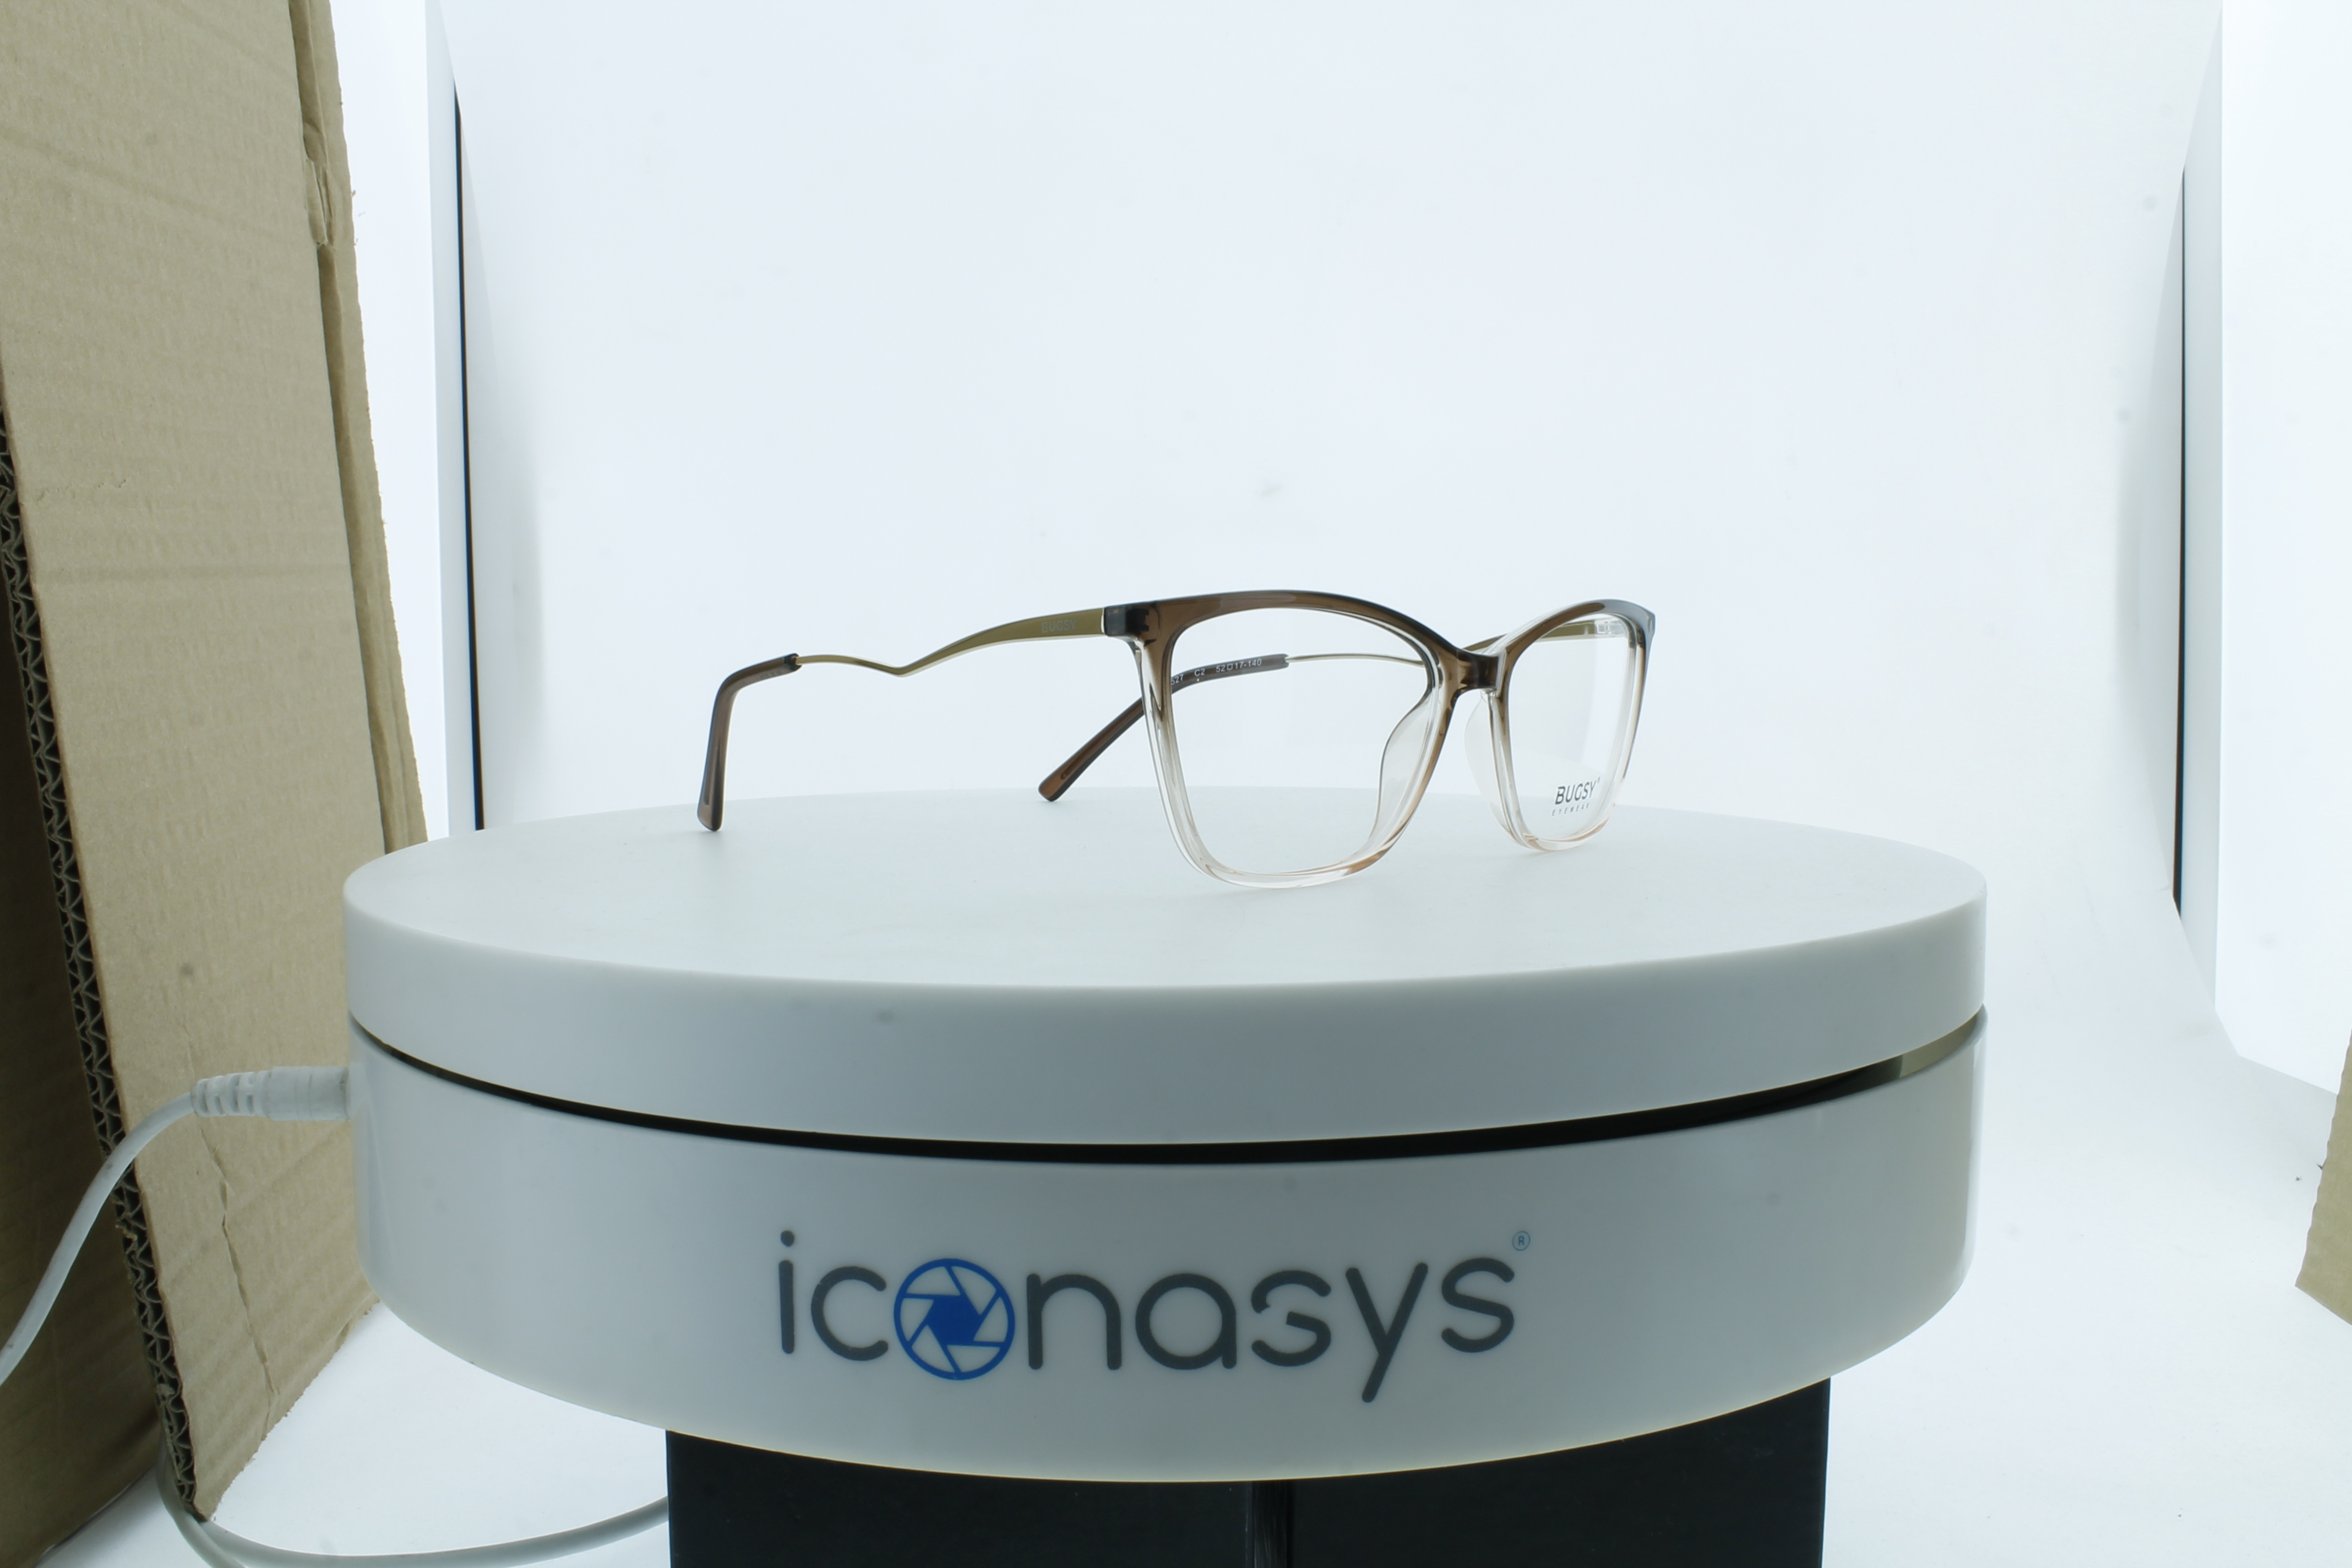

In [10]:
Image(filename='D:/UNIVERSITY/Code Debugged/runs/detect/predict/BTR4527C2_img_08.jpeg', height=600)

In [29]:
model = YOLO('D:/UNIVERSITY/Code Debugged/yolov8n.pt')
results = model.predict(source='D:/UNIVERSITY/Code Debugged/BTR4527C2_img_08.jpeg', conf=0.25)


image 1/1 D:\UNIVERSITY\Code Debugged\BTR4527C2_img_08.jpeg: 448x640 (no detections), 73.5ms
Speed: 85.1ms preprocess, 73.5ms inference, 79.8ms postprocess per image at shape (1, 3, 448, 640)


In [30]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [41]:
for result in results:
    boxes = result.boxes

bbox=boxes.xyxy.tolist()[-1]

bbox

IndexError: list index out of range

In [32]:
sam_checkpoint = "D:/UNIVERSITY/Code Debugged/sam_vit_h_4b8939.pth"
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
predictor = SamPredictor(sam)

In [33]:
image = cv2.cvtColor(cv2.imread('D:/UNIVERSITY/Code Debugged/BTR4527C2_img_08.jpeg'), cv2.COLOR_BGR2RGB)
predictor.set_image(image)

In [34]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [39]:
input_box = np.array(bbox)

masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False,
)

plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[1], plt.gca())
show_box(input_box, plt.gca())
plt.axis('off')
plt.show()

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 1 but got size 0 for tensor number 1 in the list.

In [ ]:
segmentation_mask = masks[0]
binary_mask = np.where(segmentation_mask > 0.5, 1, 0)

white_background = np.ones_like(image) * 255

new_image = white_background * (1 - binary_mask[..., np.newaxis]) + image * binary_mask[..., np.newaxis]

plt.imshow(new_image.astype(np.uint8))
plt.axis('off')
plt.show()

In [ ]:
image_path = '/content/sample.jpg'

results = model.predict(source=image_path, conf=0.25)

for result in results:
    boxes = result.boxes

bbox=boxes.xyxy.tolist()[0]

image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

predictor.set_image(image)

input_box = np.array(bbox)

masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False,
)

plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
plt.axis('off')
plt.show()

segmentation_mask = masks[0]
binary_mask = np.where(segmentation_mask > 0.5, 1, 0)

white_background = np.ones_like(image) * 255

new_image = white_background * (1 - binary_mask[..., np.newaxis]) + image * binary_mask[..., np.newaxis]

plt.imshow(new_image.astype(np.uint8))
plt.axis('off')
plt.show()